In [1]:
# using Pkg
# Pkg.activate(".")

Single Particle Spin $\tfrac{1}{2}$ system: Simple Rabi
====================================

Want to be able to represent a spin $\tfrac{1}{2}$ system so we can test the time evolution of different pulses. Our Hamiltonian can be controlled by a laser. A laser can be controlled by the intensity, frequency, and phase. While not exactly the same, these can be mapped to three parameters in our Hamiltonian:
$$
\text{intensity} \mapsto \Omega(t) \\
\text{frequency} \mapsto \Delta(t) \\
\text{phase} \mapsto \phi(t) 
$$
which appear in the Hamiltonian as follows:
$$
\hat{H} = \frac{-\Delta(t)}{2}\hat{1} 
    - \frac{-\Delta(t)}{2}\hat{\sigma}_z 
    + \frac{\Omega(t)}{2}
        (
            \cos{\phi(t)}\hat{\sigma}_x +
            \sin{\phi(t)}\hat{\sigma}_y
        )
    = \frac{-\Delta(t)}{2}\hat{1} + \frac{1}{2}\tilde{\vec{\Omega}}(t) \cdot \hat{\vec{\sigma}}
$$
for now we will take $\phi$ to be zero.

In [ ]:
using QuantumOptics
using LinearAlgebra


computational = SpinBasis(1//2)

I = identityoperator(computational)
σx = sigmax(computational)
σy = sigmay(computational)
σz = sigmaz(computational)
σ_vec = [σx, σy, σz]

Ω_eff_mag(t) = 1.0
# θ(t) = t < T ? π-m*t : 
θ(t) = π/4
Δ(t) = cos(θ(t))*Ω_eff_mag(t)
Ω(t) = -tan(θ(t))*Δ(t)
Ω_vec(t) = [Ω(t), 0.0, -Δ(t)]

T = 2π/sqrt(Ω(0.0)^2+Δ(0.0)^2)

H(t, ignored) = Ω(t)*σx/2 - Δ(t)*I/2 - Δ(t)*σz/2 

println("Checking Hamiltonian at t=0")
println(H(0.0, 0))

tspan = [0.0:0.1:T;] 
tout, psi_t = timeevolution.schroedinger_dynamic(tspan, spindown(computational), H)
psi_t[end]
println(typeof(psi_t))
println(psi_t[1],"\n---->\n", psi_t[end])

Checking Hamiltonian at t=0
Operator(dim=2x2)
  basis: Spin(1/2)
  -0.7071067811865476 + 0.0im  -0.35355339059327373 - 0.0im
 -0.35355339059327373 - 0.0im                        ⋅     
Vector{Ket{SpinBasis{1//2, Int64}, Vector{ComplexF64}}}
Ket(dim=2)
  basis: Spin(1/2)
 0.0 + 0.0im
 1.0 + 0.0im
---->
Ket(dim=2)
  basis: Spin(1/2)
 -0.0239085899897232 - 0.01711259543328074im
  0.6054447194758916 - 0.7953438503432356im


Bloch vector at t=0: 
	[1.2246467991473532e-16, 0.0, -1.0]


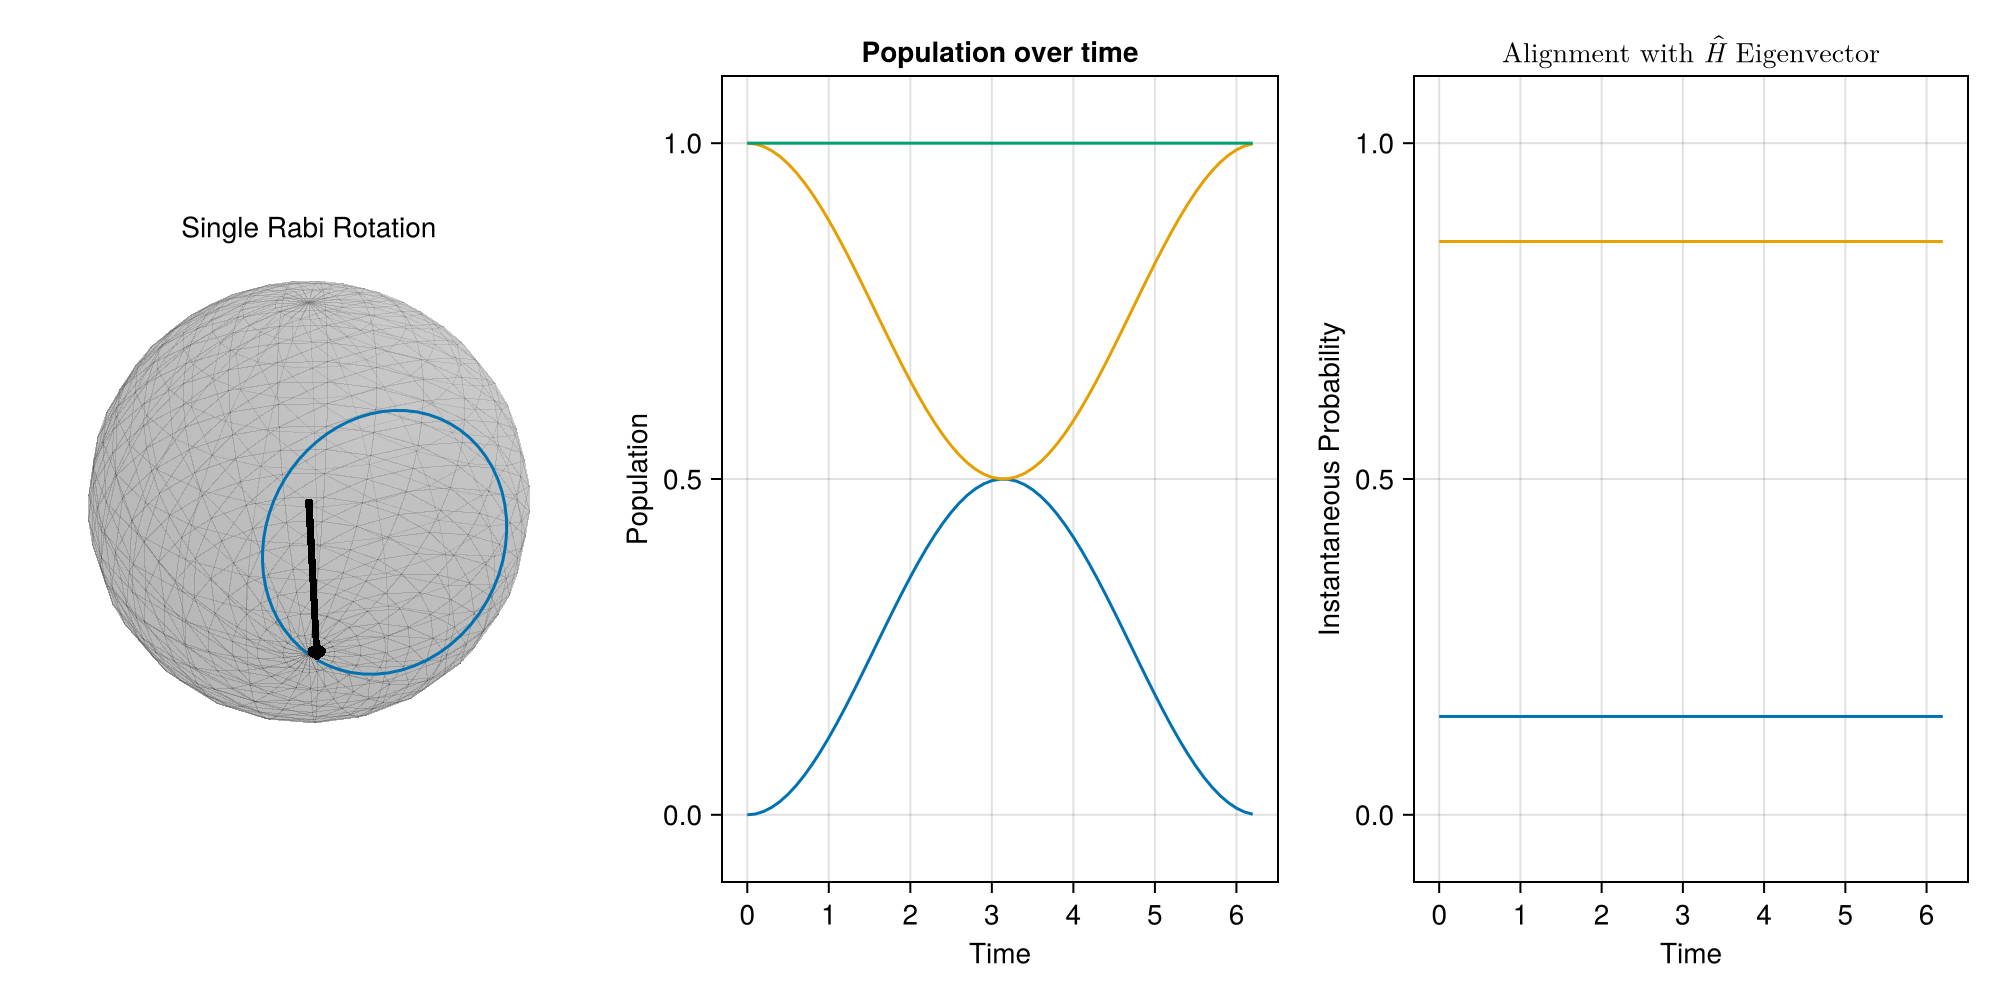

CairoMakie.Screen{IMAGE}


In [7]:
include("./Plotting.jl")
include("./Utils.jl")
using CairoMakie

println("Bloch vector at t=0: \n\t", (statevectorToBlochvector(psi_t[1])))
fig = Figure(size = (1000, 500))
bloch_fig = bloch_plot!(fig[1,1], tout, psi_t, title="Single Rabi Rotation")
population_ax = population_plot!(fig[1,2], tout, psi_t)
fig[1,3] = alignment_plot!(fig[1,3], tout, psi_t, (t -> H(t, nothing)))
display(fig)
     
